In [4]:
%pip install import-ipynb

# import import_ipynb and exploration_01 notebook
import import_ipynb
import exploration_01
import matplotlib.pyplot as plt



Note: you may need to restart the kernel to use updated packages.


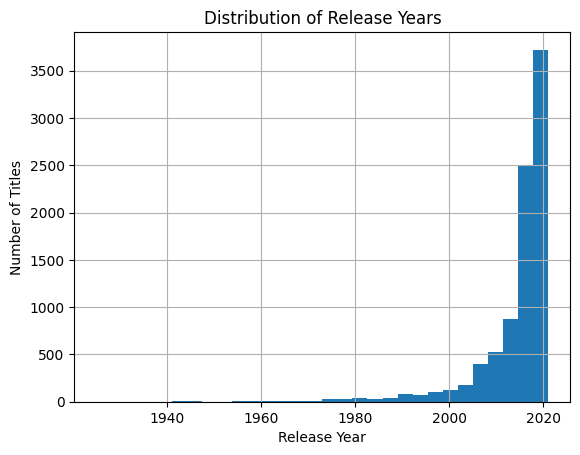

In [5]:
# Plot the distribution of release years for titles in the Netflix dataset
exploration_01.netflix_data['release_year'].hist(bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

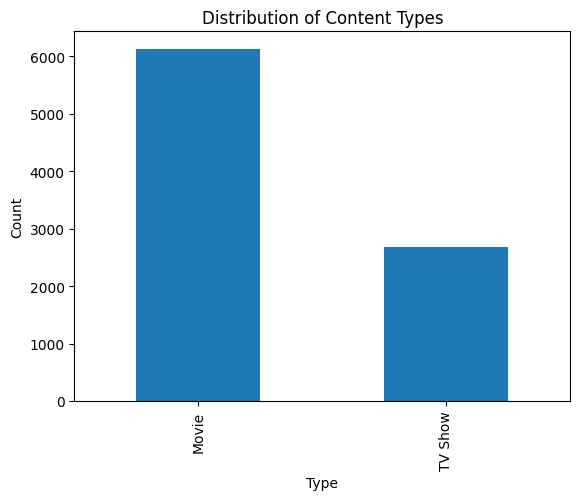

In [6]:
# Plot the distribution of content types (e.g., Movie, TV Show)
exploration_01.netflix_data['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

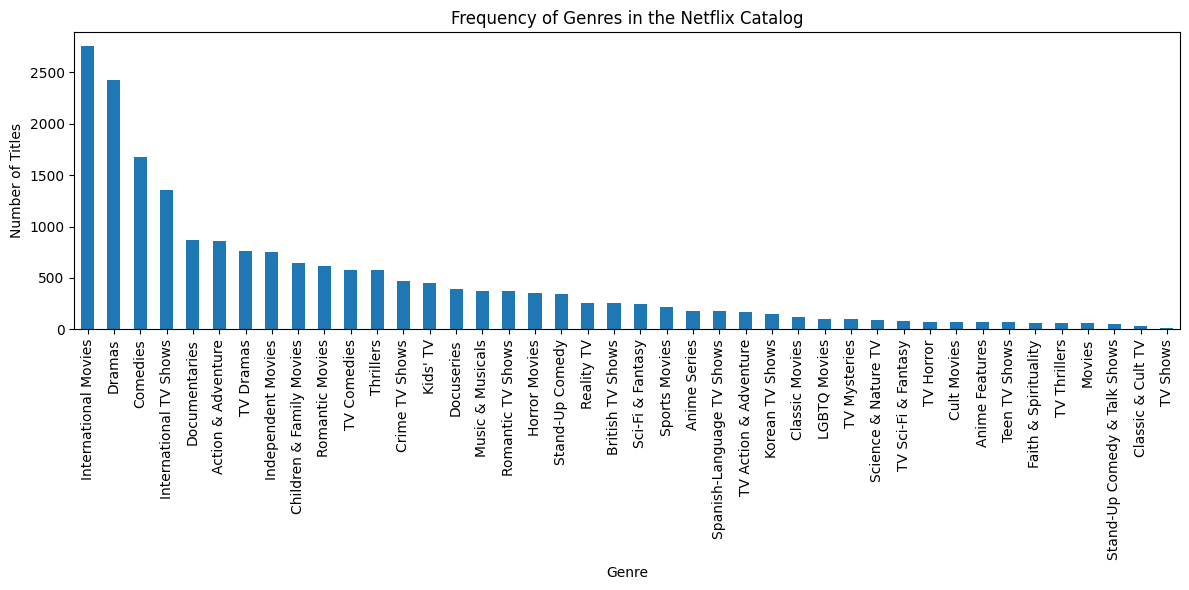

In [17]:
# Extract genres from 'listed_in', split them, and count their frequency
# We use str.split to separate genres, then explode to flatten the list, and finally value_counts to count the frequency of each genre.
genre_counts = exploration_01.netflix_data['listed_in'].str.split(', ').explode().value_counts()
print(genre_counts)

# Visualize the genre distribution with a bar chart
genre_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Genres in the Netflix Catalog')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

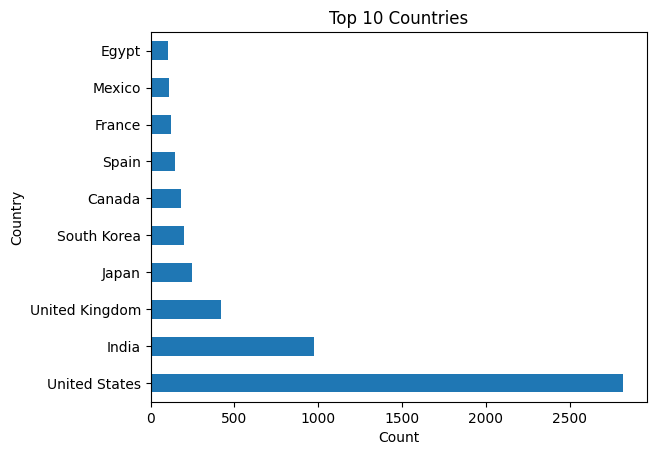

In [8]:
# Plot the top 10 countries by number of titles
exploration_01.netflix_data['country'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

/tmp/ipykernel_119298/3224937781.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)


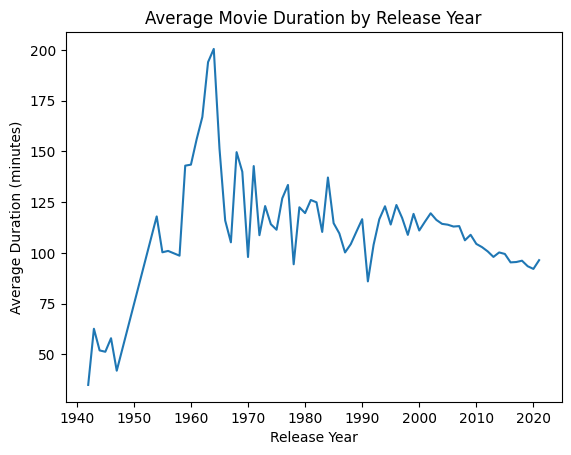

In [15]:
# Extract minutes from 'duration' for movies and group by 'release_year'
import re

# Filter only movies
movies = exploration_01.netflix_data[exploration_01.netflix_data['type'] == 'Movie']

# Extract minutes as integer
movies['minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)

# Group by release_year and calculate average duration
avg_minutes_by_year = movies.groupby('release_year')['minutes'].mean()

# Plot the result
avg_minutes_by_year.plot()
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

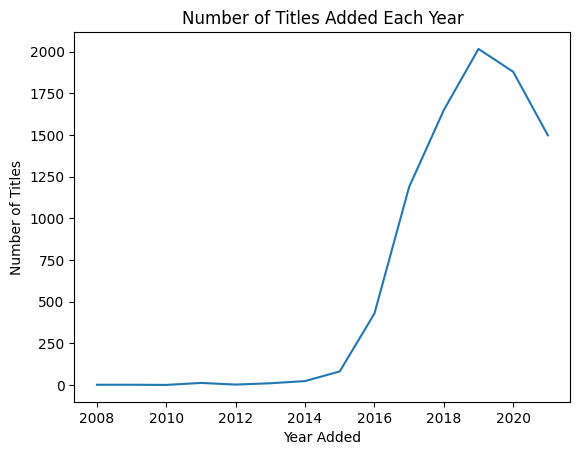

In [14]:
# Convert 'date_added' column to datetime format
import pandas as pd


exploration_01.netflix_data['date_added'] = pd.to_datetime(exploration_01.netflix_data['date_added'], format='mixed')

# Extract the year from 'date_added' and create a new column 'year_added'
exploration_01.netflix_data['year_added'] = exploration_01.netflix_data['date_added'].dt.year

# Plot the number of titles added each year
exploration_01.netflix_data['year_added'].value_counts().sort_index().plot()
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()